In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [168]:
# Read data
data = pd.read_csv('pseudo_facebook.csv')

# Choose age column from dataset
data_age_column = data.age

In [188]:
# n is sample size
# M is number of bootstrap samplings
# x is confidence interval in %
def bootstrap(n, M, x):
    mean = []
    sample = []

    for i in range(n):
        random_sample = random.sample(data_age_column.tolist(), M)
        mean.append(np.mean(random_sample))
        sample.append(random_sample)
        
    # Confidence interval
    # x = 100 * (1 - 2 * alpha)
    alpha = (100 - x) / 200
    mean.sort()
    lower_bound = mean[int(n * alpha)]
    upper_bound = mean[int(n * (1 - alpha))]
    
    fig = sns.histplot(mean, kde=True, bins=10, stat="probability")
    fig.set_xlabel('Age')
    plt.axvline(lower_bound, color='r')
    plt.axvline(upper_bound, color='r')
    plt.show()

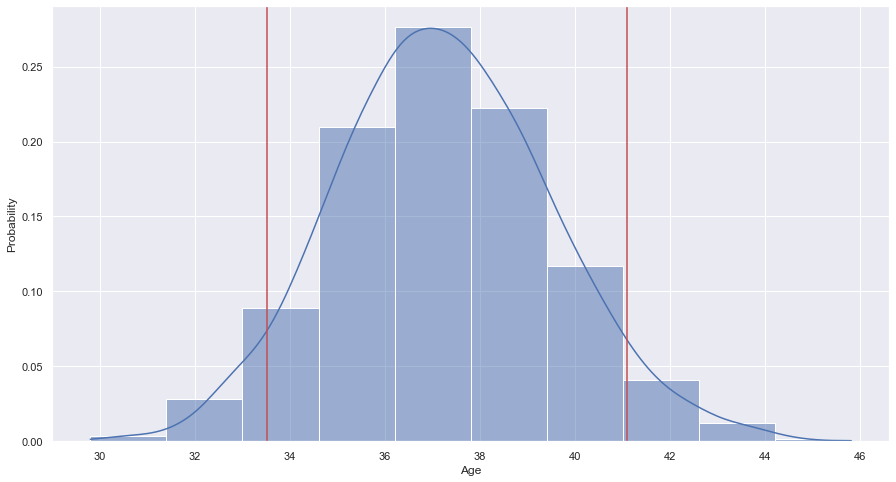

In [192]:
bootstrap(3000, 100, 90)